# Movies Dataset Analysis


## Contents:
- Imported Libraries
- Reading the Data
- Data Clearing and Formatting

## Imported Libraries
- **pandas** for holding dataset and processing
- **numpy** for list operations etc.
- **matplotlib and seaborn** for graphics and data analysis
- **ast** for its herler functions

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import json
%matplotlib inline

## Reading the Data

In [307]:
# reads the csv metadata and prints the head
df = pd.read_csv("./movies_metadata.csv", low_memory=False)

## Data Clearing and Formatting

### - Movies Metadata Dataset

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [309]:
df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


####  Columns to be Dropped
- **original_title**: since title column is also included and original_title column has non-ASCII characters, it can be dropped.
- **homepage**: there will be no analysis depending on the homepage of the movie, this column is uselesss for this specific analysis
- **imdb_id**: both ratings.csv and keywords.csv has id column to match with metadata dataset, thus no need for this column.
- **overview & tagline**: no text analysis will be made in this notebook. For retrieving the most important words, keywords.csv can be used
- **video & poster_path**: no image, video related processing will be made
- **spoken_languages**: original_language is included, no need

We will remove the above columns, also remove duplicate rows/columns and any rows/columns of data that are either NaN or null will be removed.

In [310]:
duplicated_records = df[df.duplicated()]
print(duplicated_records.head(3))


      adult belongs_to_collection budget  \
1465  False                   NaN      0   
9165  False                   NaN      0   
9327  False                   NaN      0   

                                                 genres homepage      id  \
1465  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...      NaN  105045   
9165  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...      NaN    5511   
9327  [{'id': 12, 'name': 'Adventure'}, {'id': 16, '...      NaN   23305   

        imdb_id original_language   original_title  \
1465  tt0111613                de  Das Versprechen   
9165  tt0062229                fr      Le Samouraï   
9327  tt0295682                en      The Warrior   

                                               overview  ... release_date  \
1465  East-Berlin, 1961, shortly after the erection ...  ...   1995-02-16   
9165  Hitman Jef Costello is a perfectionist who alw...  ...   1967-10-25   
9327  In feudal India, a warrior (Khan) who renounce...  ...   2001-09

In [311]:
drop_df = ["homepage", "video", "imdb_id", "original_title",  
           "spoken_languages", "tagline"]
df = df.drop(drop_df, axis=1) # drops the selected columns
df = df.drop_duplicates(keep='first') # removes the duplicates from existing dataframe
df.dropna(how="all",inplace=True) # if each column is NaN or null in a row, drops this row

Results after processing

In [312]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45449 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45449 non-null  object 
 1   belongs_to_collection  4493 non-null   object 
 2   budget                 45449 non-null  object 
 3   genres                 45449 non-null  object 
 4   id                     45449 non-null  object 
 5   original_language      45438 non-null  object 
 6   overview               44495 non-null  object 
 7   popularity             45444 non-null  object 
 8   poster_path            45063 non-null  object 
 9   production_companies   45446 non-null  object 
 10  production_countries   45446 non-null  object 
 11  release_date           45362 non-null  object 
 12  revenue                45443 non-null  float64
 13  runtime                45186 non-null  float64
 14  status                 45362 non-null  object 
 15  ti

In [313]:
count_missing_title = df['title'].isna().sum()
print(count_missing_title)


6


Out of 45449 rows, there are 6 rows with no title. Let's drop that one, too. Moreover, the types of **id, popularity and budget** is object, although they had to be numeric. Errors will be handled with coerce option, thus invalid parsing will be set as NaN. Also converting release_date to datetime instead of object and extracting the year data may be helpful.

In [314]:
df.dropna(subset=["title"], inplace=True)
df["id"] = pd.to_numeric(df['id'], errors='coerce', downcast="integer")
df["popularity"] =pd.to_numeric(df['popularity'], errors='coerce', downcast="float") 
df["budget"] =pd.to_numeric(df['budget'], errors='coerce', downcast="float") 
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

As we can see from the dataset itself and *info()* function, **belongs_to_collection** column has too many null entries, therefore instead of giving the collection name, we can convert the data to 0 and 1, 0 for not belonging and 1 for belonging. 

In [315]:
df['belongs_to_collection'] = df['belongs_to_collection'].fillna("None")
df['belongs_to_collection'] = (df['belongs_to_collection'] != "None").astype(int)

In adult column, only 9 True values are present, this information will not give us anything significant, thus, that column is also dropped.

In [316]:
df["adult"].value_counts()

False    45434
True         9
Name: adult, dtype: int64

In [317]:
df.drop(["adult"], inplace=True, axis=1)

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45443 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45443 non-null  int32         
 1   budget                 45443 non-null  float32       
 2   genres                 45443 non-null  object        
 3   id                     45443 non-null  int32         
 4   original_language      45432 non-null  object        
 5   overview               44489 non-null  object        
 6   popularity             45443 non-null  float32       
 7   poster_path            45060 non-null  object        
 8   production_companies   45443 non-null  object        
 9   production_countries   45443 non-null  object        
 10  release_date           45359 non-null  datetime64[ns]
 11  revenue                45443 non-null  float64       
 12  runtime                45186 non-null  float64       
 13  s

For **status** column, less than 100 entries are null and it may be a good idea to fill these with most common data. For **runtime**, again a similar case occurs and it can be handled by filling NaN values with the mean.

In [319]:
df["status"].fillna(df["status"].value_counts().idxmax(), inplace=True)
df["runtime"] = df["runtime"].replace(0, np.nan)
df["runtime"].fillna(df["runtime"].mean(), inplace=True) 

Since there are around 70 null **release_date** entries and filling that is not logical, they will be dropped, too. And also 1 row that has null as in column **original_language** may be dropped.

In [320]:
df.dropna(subset=["release_date"],inplace=True)
df.dropna(subset=["original_language"],inplace=True)

There are some cells, which have stringified list of json inputs such as **genres, production_companies and production_countries**. For easier processing, these have to be converted into list of inputs. The function below achieves this:

In [321]:
# converts json list to list of inputs (from the label specified with 'wanted' parameter)
def json_to_arr(cell, wanted = "name"): 
    cell = literal_eval(cell)
    if cell == [] or (isinstance(cell, float) and cell.isna()):
        return np.nan
    result = []
    counter = 0
    for element in cell:
        if counter < 3:
            result.append(element[wanted])
            counter += 1
        else:
            break
    return result[:3]

Let's apply this function to specified 3 parameters:

In [322]:
df[['genres']] = df[['genres']].applymap(json_to_arr)
df[['production_countries']] = df[['production_countries']].applymap(lambda row: 
                                                                     json_to_arr(row, "iso_3166_1"))
df[['production_companies']] = df[['production_companies']].applymap(json_to_arr)

In [323]:
df[['genres', 'production_countries','production_companies']]

,genres,production_countries,production_companies
0,"[Animation, Comedy, Family]",[US],[Pixar Animation Studios]
1,"[Adventure, Fantasy, Family]",[US],"[TriStar Pictures, Teitler Film, Interscope Co..."
2,"[Romance, Comedy]",[US],"[Warner Bros., Lancaster Gate]"
3,"[Comedy, Drama, Romance]",[US],[Twentieth Century Fox Film Corporation]
4,[Comedy],[US],"[Sandollar Productions, Touchstone Pictures]"
...,...,...,...
45460,"[Drama, Action, Romance]","[CA, DE, GB]","[Westdeutscher Rundfunk (WDR), Working Title F..."
45462,[Drama],[PH],[Sine Olivia]
45463,"[Action, Drama, Thriller]",[US],[American World Pictures]
45464,NaN,[RU],[Yermoliev]


Many entries of **budget and revenue** are 0. However, instead of 0, having NaN is more logical for seeing how many entries are actually available.

In [324]:
df['budget'] = df['budget'].replace(0 , pd.np.nan)
df['revenue'] = df['revenue'].replace(0 , pd.np.nan)

c:\Users\user\anaconda3\envs\final\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.
c:\Users\user\anaconda3\envs\final\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [325]:
print("Number of rows with budget < 100: ", len((df[(df["budget"].notna())&(df["budget"] < 100)])))
print("Number of rows with budget > 100 and < 1000: ", len(df[(df["budget"].notna())&(df["budget"] > 100)
                                                              &(df["budget"] < 1000)]))
print("Number of rows with budget > 1000 and < 10000: ", len(df[(df["budget"].notna())&(df["budget"] > 1000)
                                                              &(df["budget"] < 10000)]))

Number of rows with budget < 100:  137
Number of rows with budget > 100 and < 1000:  101
Number of rows with budget > 1000 and < 10000:  52


There are some rows that have a budget and revenue value, that are not actually scaled. By checking some of the notebooks shared, I have decided to move on with the scaling function below. For example, if the value is 1, then it scales to 1 million. If an example will be given from the true data:
- id: 17402
- Title: Miami Rhapsody
- Production Company: Hollywood Pictures	
- Date: 1995-01-27	
- Budget: 6
- Revenue: 5 (by looking IMDB, actual revenue can be seen as around 5 million)

In [326]:
def scale_money(num):
    if num < 100:
        return num * 1000000
    elif num >= 100 and num < 1000:
        return num * 10000
    elif num >= 1000 and num < 10000:
        return num *100
    else:
        return num

In [327]:
df[['budget', 'revenue']] = df[['budget', 'revenue']].applymap(scale_money)

After these steps, the columns can be osberved to see how many null or NaN entries there are. So, a heatmap and data is below:

In [328]:
null_counts = df.isna().sum()
print(null_counts)


belongs_to_collection        0
budget                   36463
genres                    2383
id                           0
original_language            0
overview                   940
popularity                   0
poster_path                339
production_companies     11787
production_countries      6206
release_date                 0
revenue                  37944
runtime                      0
status                       0
title                        0
vote_average                 0
vote_count                   0
release_year                 0
dtype: int64


In [329]:
print("NaN Genres Count: ", len(df[df["genres"].isna()]))
print("NaN Revenue Count: ", len(df[df['revenue'].isna()])) 
print("NaN Budget Count: ", len(df[df['budget'].isna()])) 
print("NaN Production Company Count: ", len(df[df["production_companies"].isna()]))
print("NaN Production Country Count: ", len(df[df["production_countries"].isna()]))

NaN Genres Count:  2383
NaN Revenue Count:  37944
NaN Budget Count:  36463
NaN Production Company Count:  11787
NaN Production Country Count:  6206


For **revenue, budget and production company** filling the values with the most appearing entry or mean is not so logical, since the number of null or NaN entries are huge (More than %20 of whoel dataset). But for **genres and country** it may be done. The function below analyzes the most occuring values for columns in list formats.

In [330]:
# returns the values and occurance times or "limiter" amount of different parameters in a 2D list
def list_counter(col, limiter = 9999, log = True):
    result = dict()
    for cell in col:
        if isinstance(cell, float):
            continue
        for element in cell:
            if element in result:
                result[element] += 1
            else:
                result[element] = 1
    if log:
        print("Size of words:", len(result))
    result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}
    if log:
        print("Sorted result is:")
    counter = 1
    sum_selected = 0
    total_selected = 0
    rest = 0
    returned = []
    for i in result: 
        if counter > limiter:
            total_selected += result[i]
        else:
            counter += 1
            sum_selected += result[i]
            total_selected += result[i]
            if log:
                print(result[i], " - ", i) 
            returned.append([i, result[i]])
    if log:
        print("Covered:", sum_selected, "out of", total_selected, "\n")
    return returned

<AxesSubplot:xlabel='genres'>

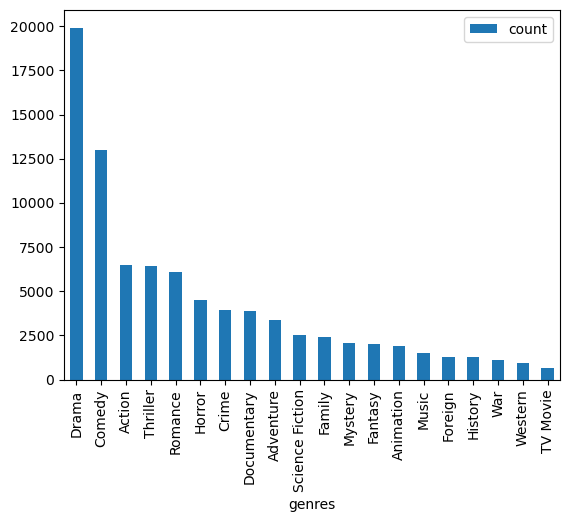

In [331]:
genres_occur = list_counter(df["genres"].values, log=False)
genres = pd.DataFrame.from_records(genres_occur, columns=["genres", "count"])
genres.plot(kind = 'bar', x="genres")

<AxesSubplot:xlabel='countries'>

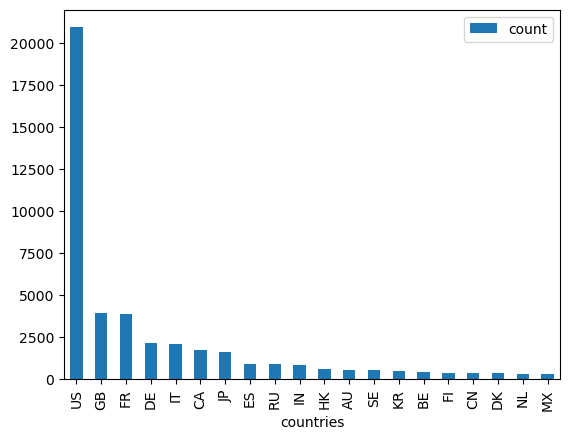

In [332]:
countries_occur = list_counter(df["production_countries"].values, log=False)
countries = pd.DataFrame.from_records(countries_occur, columns=["countries", "count"])
countries.head(20).plot(kind = 'bar', x="countries")

<AxesSubplot:xlabel='companies'>

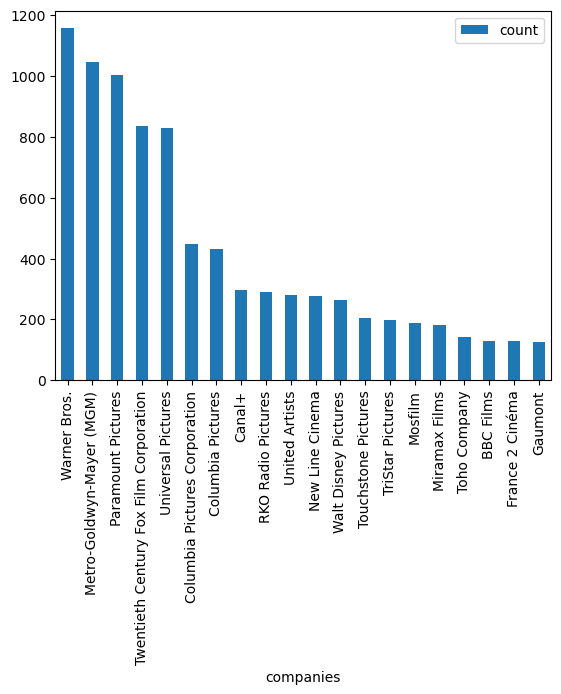

In [333]:
companies_occur = list_counter(df["production_companies"].values, log=False)
companies = pd.DataFrame.from_records(companies_occur, columns=["companies", "count"])
companies.head(20).plot(kind = 'bar', x="companies")

In **genres** *Drama* is the most occurring one with 20189 and in **production_countries** *US* is the most frequent entry. These can be placed into NA cells of these columns:

In [334]:
def fill_na_with_list(cell, data):
    if isinstance(cell, float):
        return data
    else:
        return cell

In [335]:
df[['genres']] = df[['genres']].applymap(lambda row:
                                        fill_na_with_list(row, [genres_occur[0][0]]))
df[['production_countries']] = df[['production_countries']].applymap(lambda row: 
                                        fill_na_with_list(row, [countries_occur[0][0]]))

In [336]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45348 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45348 non-null  int32         
 1   budget                 8885 non-null   float64       
 2   genres                 45348 non-null  object        
 3   id                     45348 non-null  int32         
 4   original_language      45348 non-null  object        
 5   overview               44408 non-null  object        
 6   popularity             45348 non-null  float32       
 7   poster_path            45009 non-null  object        
 8   production_companies   33561 non-null  object        
 9   production_countries   45348 non-null  object        
 10  release_date           45348 non-null  datetime64[ns]
 11  revenue                7404 non-null   float64       
 12  runtime                45348 non-null  float64       
 13  s

### - Keywords Dataset

First the csv file is read and head if the file is printed to see the format:

In [337]:
df_kwrd = pd.read_csv("./keywords.csv")
df_kwrd.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [338]:
df_kwrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


As one can see, **keywords** format is stringified list of json and it can be converted to simple list with using the function written above and problematic ones can be calculated:

In [339]:
df_kwrd["keywords"] = df_kwrd[['keywords']].applymap(json_to_arr)

In [340]:
df_kwrd["keywords"]

0                                     [jealousy, toy, boy]
1        [board game, disappearance, based on children'...
2             [fishing, best friend, duringcreditsstinger]
3        [based on novel, interracial relationship, sin...
4                       [baby, midlife crisis, confidence]
                               ...                        
46414                                        [tragic love]
46415                                [artist, play, pinoy]
46416                                                  NaN
46417                                                  NaN
46418                                                  NaN
Name: keywords, Length: 46419, dtype: object

In [341]:
null_counts = df_kwrd.isna().sum()
print(null_counts)


id              0
keywords    14795
dtype: int64


In [342]:
df_kwrd.dropna(inplace=True)

<AxesSubplot:xlabel='keywords'>

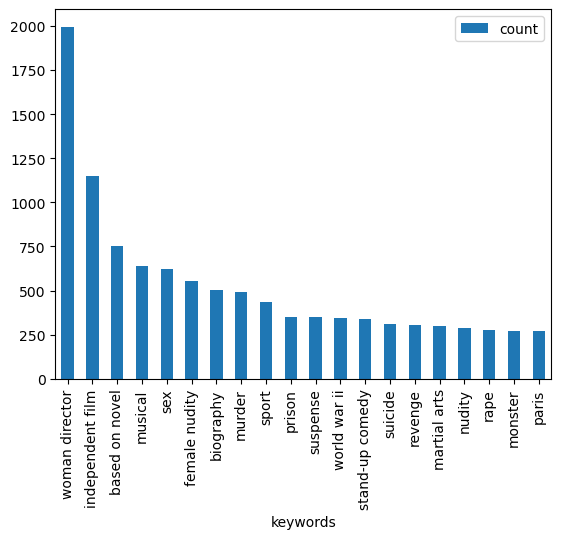

In [343]:
keywords_occur = list_counter(df_kwrd["keywords"].values, log=False)
keywords = pd.DataFrame.from_records(keywords_occur, columns=["keywords", "count"])
keywords.head(20).plot(kind = 'bar', x="keywords")

Since **id** parameters in both metadata and keywords directing to the same movie, the datasets can be merged.

In [344]:
df = pd.merge(df, df_kwrd, on=['id'], how='left')

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45890 entries, 0 to 45889
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45890 non-null  int32         
 1   budget                 8974 non-null   float64       
 2   genres                 45890 non-null  object        
 3   id                     45890 non-null  int32         
 4   original_language      45890 non-null  object        
 5   overview               44941 non-null  object        
 6   popularity             45890 non-null  float32       
 7   poster_path            45550 non-null  object        
 8   production_companies   33983 non-null  object        
 9   production_countries   45890 non-null  object        
 10  release_date           45890 non-null  datetime64[ns]
 11  revenue                7473 non-null   float64       
 12  runtime                45890 non-null  float64       
 13  s

### - Credits Dataset

First the dataset is read and first couple of columns are printed to see the appearance of the data:

In [346]:
df_cr = pd.read_csv("./credits.csv")
df_cr.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


Since cast and crew type is stringified list of json, we can again extract the names from the cast and directors from the crew.

In [347]:
df_cr["cast"] = df_cr[['cast']].applymap(json_to_arr)

In [348]:
df_cr['crew']

0        [{'credit_id': '52fe4284c3a36847f8024f49', 'de...
1        [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...
2        [{'credit_id': '52fe466a9251416c75077a89', 'de...
3        [{'credit_id': '52fe44779251416c91011acb', 'de...
4        [{'credit_id': '52fe44959251416c75039ed7', 'de...
                               ...                        
45471    [{'credit_id': '5894a97d925141426c00818c', 'de...
45472    [{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...
45473    [{'credit_id': '52fe4776c3a368484e0c8387', 'de...
45474    [{'credit_id': '533bccebc3a36844cf0011a7', 'de...
45475    [{'credit_id': '593e676c92514105b702e68e', 'de...
Name: crew, Length: 45476, dtype: object

In [349]:
df_cr["cast"]

0                      [Tom Hanks, Tim Allen, Don Rickles]
1           [Robin Williams, Jonathan Hyde, Kirsten Dunst]
2               [Walter Matthau, Jack Lemmon, Ann-Margret]
3        [Whitney Houston, Angela Bassett, Loretta Devine]
4               [Steve Martin, Diane Keaton, Martin Short]
                               ...                        
45471          [Leila Hatami, Kourosh Tahami, Elham Korda]
45472           [Angel Aquino, Perry Dizon, Hazel Orencio]
45473         [Erika Eleniak, Adam Baldwin, Julie du Page]
45474    [Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...
45475                                                  NaN
Name: cast, Length: 45476, dtype: object

In [350]:
def get_director(x):
    x = literal_eval(x)
    for i in x:
        if i == "[]" or isinstance(i, float):
            return np.nan
        if i['job'] == 'Director':
            return i['name']
    return np.nan

df_cr['director'] = df_cr['crew'].apply(get_director)
df_cr.drop(["crew"], axis=1, inplace=True)

If there are cells with both missing cast and director columns, they should be dropped:

In [351]:
print("Entries with no cast:", len(df_cr[df_cr["cast"].isna()]))
print("Entries with no directors:", len(df_cr[df_cr["director"].isna()]))
print("Entries missing both:", len(df_cr[(df_cr["cast"].isna())&(df_cr["director"].isna())]))
df_cr.drop(df_cr[(df_cr["cast"].isna())&(df_cr["director"].isna())].index, inplace=True)

Entries with no cast: 2418
Entries with no directors: 887
Entries missing both: 437


The **id** of metadata and **id** of credits columns point to the same movies, thus, both datasets can be converged.

In [352]:
df = pd.merge(df, df_cr, on=['id'], how='left')

The final situation in the main dataframe is below:

In [353]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45976 entries, 0 to 45975
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45976 non-null  int32         
 1   budget                 9010 non-null   float64       
 2   genres                 45976 non-null  object        
 3   id                     45976 non-null  int32         
 4   original_language      45976 non-null  object        
 5   overview               45027 non-null  object        
 6   popularity             45976 non-null  float32       
 7   poster_path            45636 non-null  object        
 8   production_companies   34047 non-null  object        
 9   production_countries   45976 non-null  object        
 10  release_date           45976 non-null  datetime64[ns]
 11  revenue                7505 non-null   float64       
 12  runtime                45976 non-null  float64       
 13  s

In [354]:
null_counts = df.isna().sum()
print(null_counts)

belongs_to_collection        0
budget                   36966
genres                       0
id                           0
original_language            0
overview                   949
popularity                   0
poster_path                340
production_companies     11929
production_countries         0
release_date                 0
revenue                  38471
runtime                      0
status                       0
title                        0
vote_average                 0
vote_count                   0
release_year                 0
keywords                 14289
cast                      2373
director                   839
dtype: int64


In [355]:

df["genres"] = df["genres"].apply(tuple)
df["production_companies"] = df["production_companies"].dropna().apply(tuple)
df["production_countries"] = df["production_countries"].dropna().apply(tuple)
df["keywords"] = df["keywords"].dropna().apply(tuple)
df["cast"] = df["cast"].dropna().apply(tuple)

In [356]:
df.drop_duplicates(inplace=True)

In [362]:
df_read = pd.read_csv("./movie_metadata_out.csv", low_memory=False)

In [363]:
df_cast = df_read
df_movie = df_read
drop_df_cast = ["belongs_to_collection", "budget", "genres", "original_language", "overview", "popularity", "poster_path", "production_companies"
                , "production_countries", "release_date", "revenue", "runtime", "status", "title", "vote_average", "vote_count", "release_year", "keywords"]
drop_df_movie = ["cast", "director"]
df_cast = df_cast.drop(drop_df_cast, axis=1)
df_movie = df_movie.drop(drop_df_movie, axis=1)

In [364]:
df_cast.to_csv("./clean/cast.csv",sep=',',index=False,header=True)
df_movie.to_csv("./clean/movie.csv",sep=',',index=False,header=True)